## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [9]:
from keras.layers import Dropout

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drp_ratio=0.2):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [10]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
DROPOUT_EXPS = [0.4, 0.2, 0.1]
NEURONS_EXPS = [[512, 256, 128], [512, 256, 128, 64], [512, 256, 128, 64, 32]]

In [11]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

def get_tag(dropout, neurons):
    return '%d_layer-dropout_%.1f' % (len(neurons), dropout)

def fit(neurons, dropout):
    model = build_mlp(input_shape=x_train.shape[1:], num_neurons=neurons, drp_ratio=dropout)
    model.summary()
    optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = get_tag(dropout, neurons)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

for neurons in NEURONS_EXPS:
    for dropout in DROPOUT_EXPS:
        fit(neurons, dropout)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0   

Epoch 46/50
50000/50000 [==============================] - 9s 189us/step - loss: 1.7222 - accuracy: 0.3733 - val_loss: 1.7360 - val_accuracy: 0.4019
Epoch 47/50
50000/50000 [==============================] - 9s 189us/step - loss: 1.7193 - accuracy: 0.3751 - val_loss: 1.7197 - val_accuracy: 0.4066
Epoch 48/50
50000/50000 [==============================] - 9s 187us/step - loss: 1.7141 - accuracy: 0.3750 - val_loss: 1.6878 - val_accuracy: 0.4173
Epoch 49/50
50000/50000 [==============================] - 10s 190us/step - loss: 1.7164 - accuracy: 0.3737 - val_loss: 1.6964 - val_accuracy: 0.4118
Epoch 50/50
50000/50000 [==============================] - 9s 185us/step - loss: 1.7203 - accuracy: 0.3754 - val_loss: 1.7014 - val_accuracy: 0.4159
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3072)              0         
_______________________________________

50000/50000 [==============================] - 9s 184us/step - loss: 1.4152 - accuracy: 0.4903 - val_loss: 1.4155 - val_accuracy: 0.4948
Epoch 42/50
50000/50000 [==============================] - 9s 187us/step - loss: 1.4206 - accuracy: 0.4911 - val_loss: 1.4037 - val_accuracy: 0.4943
Epoch 43/50
50000/50000 [==============================] - 9s 185us/step - loss: 1.4086 - accuracy: 0.4922 - val_loss: 1.3992 - val_accuracy: 0.5078
Epoch 44/50
50000/50000 [==============================] - 9s 184us/step - loss: 1.4077 - accuracy: 0.4925 - val_loss: 1.4290 - val_accuracy: 0.4898
Epoch 45/50
50000/50000 [==============================] - 9s 186us/step - loss: 1.4074 - accuracy: 0.4952 - val_loss: 1.3856 - val_accuracy: 0.5053
Epoch 46/50
50000/50000 [==============================] - 9s 185us/step - loss: 1.4013 - accuracy: 0.4955 - val_loss: 1.3739 - val_accuracy: 0.5036
Epoch 47/50
50000/50000 [==============================] - 9s 183us/step - loss: 1.4070 - accuracy: 0.4948 - val_loss:

50000/50000 [==============================] - 10s 206us/step - loss: 1.2314 - accuracy: 0.5581 - val_loss: 1.3644 - val_accuracy: 0.5155
Epoch 37/50
50000/50000 [==============================] - 10s 207us/step - loss: 1.2286 - accuracy: 0.5588 - val_loss: 1.3545 - val_accuracy: 0.5146
Epoch 38/50
50000/50000 [==============================] - 11s 214us/step - loss: 1.2195 - accuracy: 0.5612 - val_loss: 1.3317 - val_accuracy: 0.5256
Epoch 39/50
50000/50000 [==============================] - 10s 208us/step - loss: 1.2217 - accuracy: 0.5612 - val_loss: 1.3457 - val_accuracy: 0.5230
Epoch 40/50
50000/50000 [==============================] - 10s 202us/step - loss: 1.2182 - accuracy: 0.5602 - val_loss: 1.3406 - val_accuracy: 0.5207
Epoch 41/50
50000/50000 [==============================] - 10s 202us/step - loss: 1.2072 - accuracy: 0.5664 - val_loss: 1.3178 - val_accuracy: 0.5283
Epoch 42/50
50000/50000 [==============================] - 10s 202us/step - loss: 1.2067 - accuracy: 0.5645 - va

50000/50000 [==============================] - 11s 222us/step - loss: 1.9191 - accuracy: 0.2795 - val_loss: 1.9217 - val_accuracy: 0.2953
Epoch 30/50
50000/50000 [==============================] - 11s 216us/step - loss: 1.9211 - accuracy: 0.2788 - val_loss: 1.9114 - val_accuracy: 0.3045
Epoch 31/50
50000/50000 [==============================] - 11s 218us/step - loss: 1.9171 - accuracy: 0.2816 - val_loss: 1.9236 - val_accuracy: 0.2935
Epoch 32/50
50000/50000 [==============================] - 11s 224us/step - loss: 1.9116 - accuracy: 0.2848 - val_loss: 1.9088 - val_accuracy: 0.3034
Epoch 33/50
50000/50000 [==============================] - 11s 224us/step - loss: 1.9062 - accuracy: 0.2848 - val_loss: 1.9571 - val_accuracy: 0.2879
Epoch 34/50
50000/50000 [==============================] - 11s 212us/step - loss: 1.9043 - accuracy: 0.2858 - val_loss: 1.9163 - val_accuracy: 0.3030
Epoch 35/50
50000/50000 [==============================] - 11s 212us/step - loss: 1.9071 - accuracy: 0.2871 - va

50000/50000 [==============================] - 10s 196us/step - loss: 1.5703 - accuracy: 0.4358 - val_loss: 1.4949 - val_accuracy: 0.4735
Epoch 23/50
50000/50000 [==============================] - 10s 195us/step - loss: 1.5645 - accuracy: 0.4404 - val_loss: 1.4853 - val_accuracy: 0.4748
Epoch 24/50
50000/50000 [==============================] - 10s 197us/step - loss: 1.5539 - accuracy: 0.4444 - val_loss: 1.4997 - val_accuracy: 0.4669
Epoch 25/50
50000/50000 [==============================] - 10s 197us/step - loss: 1.5546 - accuracy: 0.4425 - val_loss: 1.4901 - val_accuracy: 0.4626
Epoch 26/50
50000/50000 [==============================] - 10s 196us/step - loss: 1.5480 - accuracy: 0.4418 - val_loss: 1.4909 - val_accuracy: 0.4766
Epoch 27/50
50000/50000 [==============================] - 10s 198us/step - loss: 1.5537 - accuracy: 0.4464 - val_loss: 1.4852 - val_accuracy: 0.4763
Epoch 28/50
50000/50000 [==============================] - 10s 198us/step - loss: 1.5432 - accuracy: 0.4441 - va

50000/50000 [==============================] - 11s 224us/step - loss: 1.4380 - accuracy: 0.4840 - val_loss: 1.4291 - val_accuracy: 0.4897
Epoch 16/50
50000/50000 [==============================] - 11s 214us/step - loss: 1.4186 - accuracy: 0.4914 - val_loss: 1.4132 - val_accuracy: 0.5000
Epoch 17/50
50000/50000 [==============================] - 12s 236us/step - loss: 1.4104 - accuracy: 0.4962 - val_loss: 1.4153 - val_accuracy: 0.4927
Epoch 18/50
50000/50000 [==============================] - 11s 229us/step - loss: 1.4025 - accuracy: 0.4987 - val_loss: 1.3872 - val_accuracy: 0.5111
Epoch 19/50
50000/50000 [==============================] - 11s 213us/step - loss: 1.3815 - accuracy: 0.5074 - val_loss: 1.3878 - val_accuracy: 0.5026
Epoch 20/50
50000/50000 [==============================] - 11s 211us/step - loss: 1.3814 - accuracy: 0.5075 - val_loss: 1.3953 - val_accuracy: 0.5092
Epoch 21/50
50000/50000 [==============================] - 11s 215us/step - loss: 1.3664 - accuracy: 0.5121 - va

50000/50000 [==============================] - 11s 220us/step - loss: 2.1011 - accuracy: 0.1859 - val_loss: 2.0936 - val_accuracy: 0.2088
Epoch 7/50
50000/50000 [==============================] - 11s 226us/step - loss: 2.0955 - accuracy: 0.1914 - val_loss: 2.1184 - val_accuracy: 0.1935
Epoch 8/50
50000/50000 [==============================] - 11s 219us/step - loss: 2.0832 - accuracy: 0.1934 - val_loss: 2.1158 - val_accuracy: 0.1930
Epoch 9/50
50000/50000 [==============================] - 11s 221us/step - loss: 2.0742 - accuracy: 0.2000 - val_loss: 2.0927 - val_accuracy: 0.2005
Epoch 10/50
50000/50000 [==============================] - 11s 223us/step - loss: 2.0725 - accuracy: 0.1993 - val_loss: 2.0702 - val_accuracy: 0.2048
Epoch 11/50
50000/50000 [==============================] - 11s 217us/step - loss: 2.0626 - accuracy: 0.2029 - val_loss: 2.0847 - val_accuracy: 0.2009
Epoch 12/50
50000/50000 [==============================] - 11s 215us/step - loss: 2.0631 - accuracy: 0.2026 - val_l

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 14s 271us/step - loss: 2.1998 - accuracy: 0.1548 - val_loss: 2.0113 - val_accuracy: 0.2454
Epoch 2/50
50000/50000 [==============================] - 10s 206us/step - loss: 2.0126 - accuracy: 0.2459 - val_loss: 1.8839 - val_accuracy: 0.3072
Epoch 3/50
50000/50000 [==============================] - 12s 241us/step - loss: 1.9194 - accuracy: 0.2911 - val_loss: 1.8266 - val_accuracy: 0.3355
Epoch 4/50
50000/50000 [==============================] - 11s 216us/step - loss: 1.8711 - accuracy: 0.3087 - val_loss: 1.7810 - val_accuracy: 0.3567
Epoch 5/50
50000/50000 [==============================] - 10s 205us/step - loss: 1.8465 - accuracy: 0.3228 - val_loss: 1.7552 - val_accuracy: 0.3717
Epoch 6/50
50000/50000 [==============================] - 11s 225us/step - loss: 1.8172 - accuracy: 0.3379 - val_loss: 1.7106 - val_accuracy: 0.3847
Epoch 7/50
50000/50000 [==============================] 

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 13s 259us/step - loss: 2.1339 - accuracy: 0.1984 - val_loss: 1.8928 - val_accuracy: 0.3251
Epoch 2/50
50000/50000 [==============================] - 11s 221us/step - loss: 1.8892 - accuracy: 0.3145 - val_loss: 1.7585 - val_accuracy: 0.3736
Epoch 3/50
50000/50000 [==============================] - 12s 233us/step - loss: 1.8012 - accuracy: 0.3515 - val_loss: 1.6941 - val_accuracy: 0.3900
Epoch 4/50
50000/50000 [==============================] - 11s 223us/step - loss: 1.7514 - accuracy: 0.3721 - val_loss: 1.6718 - val_accuracy: 0.4041
Epoch 5/50
50000/50000 [==============================] - 10s 209us/step - loss: 1.7020 - accuracy: 0.3891 - val_loss: 1.6149 - val_accuracy: 0.4279
Epoch 6/50
50000/50000 [==============================] - 10s 209us/step - loss: 1.6749 - accuracy: 0.4007 - val_loss: 1.5869 - val_accuracy: 0.4332
Epoch 7/50
50000/50000 [==============================] 

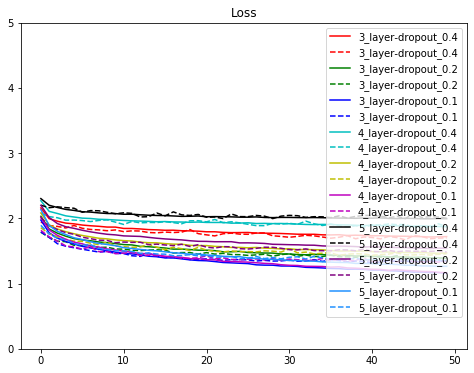

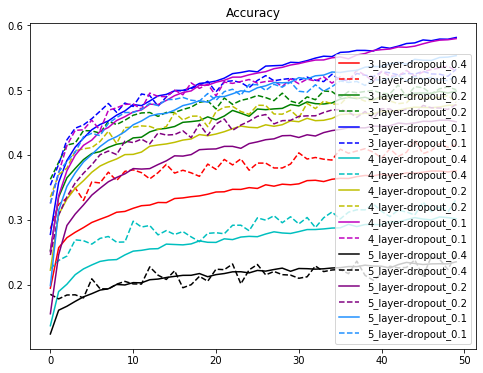

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "c", "y", "m", "k", "purple", "dodgerblue"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()